In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [2]:
import cv2

In [3]:
target=[]
images=[]
flat_data=[]
datadir="./train/"
categories=['indian people','others']
for category in categories:
    class_num=categories.index(category)
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized=resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_array)
        target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [4]:
len(flat_data[0])

67500

In [5]:
target

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=0)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
    {'C':[1,10,100],'kernel':['linear']},
    
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']}])

<BarContainer object of 2 artists>

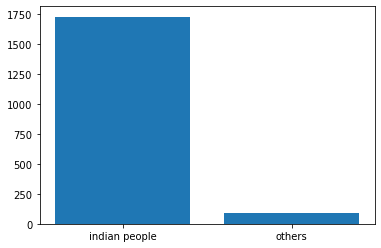

In [7]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [12]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
accuracy_score(y_pred,y_test)

0.9926605504587156

In [16]:
import pickle
pickle.dump(clf,open('human images model.p','wb'))

In [17]:
model=pickle.load(open('human images model.p','rb'))

Enter ur url./DMtest/itest.jpg
(769, 588, 3)
 PREDICTED OUTPUT: indian people


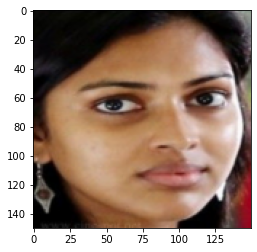

In [56]:
    
    
    
    flat_data=[]
    url=input("Enter ur url")
    img=imread(url)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out=model.predict(flat_data)
    y_out=categories[y_out[0]]
    print(f' PREDICTED OUTPUT: {y_out}')

Enter ur url./DMtest/original.jpg/
(960, 640, 3)
 PREDICTED OUTPUT: others


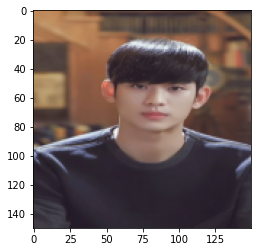

In [45]:
    flat_data=[]
    url=input("Enter ur url")
    img=imread(url)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out=model.predict(flat_data)
    y_out=categories[y_out[0]]
    print(f' PREDICTED OUTPUT: {y_out}')

In [95]:
ptodata="./cropped/"
ptocdata="./final Indians/"
ptoodata='./final others/'

In [96]:
img_dir=[]
for i in os.scandir(ptodata):
    if i.is_dir():
        img_dir.append(i.path)

In [97]:
img_dir

['./cropped/ Indian dusky Faces',
 './cropped/business men of india',
 './cropped/Dark tone Indian Faces',
 './cropped/Famous South Indian Actors',
 './cropped/Gujarati Indian Faces',
 "./cropped/India's richest men",
 './cropped/indian actors',
 './cropped/indian baby faces',
 './cropped/indian bollywood actors',
 './cropped/indian bollywood heroes',
 './cropped/indian brides',
 './cropped/indian classical dancers',
 './cropped/indian cricketers',
 './cropped/indian dancers',
 './cropped/Indian Faces',
 './cropped/Indian fair Faces',
 './cropped/indian freedom fighters',
 './cropped/indian grooms',
 './cropped/indian politicians',
 './cropped/indian rajasthani people faces',
 './cropped/indian serial actors',
 './cropped/indian singers',
 './cropped/indian tollywood actors',
 './cropped/indian tollywood heroes',
 './cropped/Kashmiri people Faces',
 './cropped/Marathi Indian Faces',
 './cropped/Ministers of India',
 './cropped/NON Indian Faces',
 './cropped/North-East Indian Faces',
 '

In [76]:
categories

['indian people', 'others']

In [98]:
for i in img_dir:
    for j in os.scandir(i):
        flat_data=[]
        url=j.path
        img=imread(j.path)
        img_resized=resize(img,(150,150,3))
        flat_data.append(img_resized.flatten())
        flat_data=np.array(flat_data)
        y_out=model.predict(flat_data)
        y_out=categories[y_out[0]]
        print(f' PREDICTED OUTPUT: {y_out}')
        if(y_out=='indian people'):
            shutil.move(j.path,ptocdata)
        else:
            shutil.move(j.path,ptoodata)


 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: others
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT: indian people
 PREDICTED OUTPUT

In [101]:
count=0

for j in os.scandir(ptocdata):
       count+=1 
print("the total count of indian images are: ",count)

the total count of indian images are:  1748
